In [ ]:
# Comp2002 Part 1 Machine Learning

# Comp2002 Part 1 Machine Learning

## Modules used

In [2]:
# Pandas module for importing the data from the csv
import pandas as pd
#Principle Component Analysis module for reducing data dimensionality from 13 to 2 (plottable on xy)
from sklearn.decomposition import PCA
#Random forest regressor
from sklearn.ensemble import RandomForestRegressor
#Importing Numpy module for compressing array !!check if more uses needed
import numpy as np
#train test split
from sklearn.model_selection import train_test_split
#mean absolute error
from sklearn.metrics import mean_absolute_error
#for normalising
from sklearn.preprocessing import MinMaxScaler
#for cross validation
from sklearn.model_selection import cross_val_score
#for the neural network
from sklearn.neural_network import MLPRegressor
#importing the svm
from sklearn import svm
#importing the module for boxplots
import matplotlib.pyplot as plt
#for the evolutionary computation
import random

Matplotlib is building the font cache; this may take a moment.


In [ ]:
#pandas properties and methods
#dir(pd)

In [ ]:
#PCA properties and methods
#dir(PCA)

In [3]:
#Numpy properties and methods
#dir(np)

## Task 1.1 Data preparation

- ### Loading the data
- ### Normalising the data

### Loading the data

In [4]:
#importing the data from both csv files
dataframeFF1 = pd.read_csv('AlgerianFF_Region1.csv')
dataframeFF2 = pd.read_csv('AlgerianFF_Region2.csv')
print(dataframeFF1)

     day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC    DC  ISI  \
0      1      6  2012           29   57   18    0.0  65.7  3.4   7.6  1.3   
1      2      6  2012           29   61   13    1.3  64.4  4.1   7.6  1.0   
2      3      6  2012           26   82   22   13.1  47.1  2.5   7.1  0.3   
3      4      6  2012           25   89   13    2.5  28.6  1.3   6.9  0.0   
4      5      6  2012           27   77   16    0.0  64.8  3.0  14.2  1.2   
..   ...    ...   ...          ...  ...  ...    ...   ...  ...   ...  ...   
117   26      9  2012           31   54   11    0.0  82.0  6.0  16.3  2.5   
118   27      9  2012           31   66   11    0.0  85.7  8.3  24.9  4.0   
119   28      9  2012           32   47   14    0.7  77.5  7.1   8.8  1.8   
120   29      9  2012           26   80   16    1.8  47.4  2.9   7.7  0.3   
121   30      9  2012           25   78   14    1.4  45.0  1.9   7.5  0.2   

     BUI  FWI  
0    3.4  0.5  
1    3.9  0.4  
2    2.7  0.1  
3    1.7  0

In [5]:
print(dataframeFF2)

     day  month  year  Temperature   RH   Ws  Rain   FFMC   DMC    DC  ISI  \
0      1      6  2012           32   71   12    0.7  57.1   2.5   8.2  0.6   
1      2      6  2012           30   73   13    4.0  55.7   2.7   7.8  0.6   
2      3      6  2012           29   80   14    2.0  48.7   2.2   7.6  0.3   
3      4      6  2012           30   64   14    0.0  79.4   5.2  15.4  2.2   
4      5      6  2012           32   60   14    0.2  77.1   6.0  17.6  1.8   
..   ...    ...   ...          ...  ...  ...    ...   ...   ...   ...  ...   
117   26      9  2012           30   65   14    0.0  85.4  16.0  44.5  4.5   
118   27      9  2012           28   87   15    4.4  41.1   6.5   8.0  0.1   
119   28      9  2012           27   87   29    0.5  45.9   3.5   7.9  0.4   
120   29      9  2012           24   54   18    0.1  79.7   4.3  15.2  1.7   
121   30      9  2012           24   64   15    0.2  67.3   3.8  16.5  1.2   

      BUI  FWI  
0     2.8  0.2  
1     2.9  0.2  
2     2.6  0

In [6]:
#using pandas to make 1 combined dataframe
dataframeCombined = pd.concat([dataframeFF1,dataframeFF2])

In [7]:
#244 rows expected - no missing data
print(dataframeCombined)

     day  month  year  Temperature   RH   Ws  Rain   FFMC   DMC    DC  ISI  \
0      1      6  2012           29   57   18    0.0  65.7   3.4   7.6  1.3   
1      2      6  2012           29   61   13    1.3  64.4   4.1   7.6  1.0   
2      3      6  2012           26   82   22   13.1  47.1   2.5   7.1  0.3   
3      4      6  2012           25   89   13    2.5  28.6   1.3   6.9  0.0   
4      5      6  2012           27   77   16    0.0  64.8   3.0  14.2  1.2   
..   ...    ...   ...          ...  ...  ...    ...   ...   ...   ...  ...   
117   26      9  2012           30   65   14    0.0  85.4  16.0  44.5  4.5   
118   27      9  2012           28   87   15    4.4  41.1   6.5   8.0  0.1   
119   28      9  2012           27   87   29    0.5  45.9   3.5   7.9  0.4   
120   29      9  2012           24   54   18    0.1  79.7   4.3  15.2  1.7   
121   30      9  2012           24   64   15    0.2  67.3   3.8  16.5  1.2   

      BUI  FWI  
0     3.4  0.5  
1     3.9  0.4  
2     2.7  0

### Normalising the data

In [8]:
scaler = MinMaxScaler()

In [9]:
scaler.fit(dataframeCombined)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [10]:
scaledDataframe = scaler.transform(dataframeCombined)

In [11]:
print(scaledDataframe)

[[0.         0.         0.         ... 0.06842105 0.03437967 0.01607717]
 [0.03333333 0.         0.         ... 0.05263158 0.04185351 0.01286174]
 [0.06666667 0.         0.         ... 0.01578947 0.02391629 0.00321543]
 ...
 [0.9        1.         0.         ... 0.02105263 0.03437967 0.00643087]
 [0.93333333 1.         0.         ... 0.08947368 0.05979073 0.02250804]
 [0.96666667 1.         0.         ... 0.06315789 0.05530643 0.01607717]]


In [12]:
#making x equal to the "inputs" (everything but final)
#using the first 12 columns to predict the 13th (y)
#244 values in 12 columns expected
x = scaledDataframe[:, :-1]
print(x)
x.shape

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.27868852e-03
  6.84210526e-02 3.43796712e-02]
 [3.33333333e-02 0.00000000e+00 0.00000000e+00 ... 3.27868852e-03
  5.26315789e-02 4.18535127e-02]
 [6.66666667e-02 0.00000000e+00 0.00000000e+00 ... 9.36768150e-04
  1.57894737e-02 2.39162930e-02]
 ...
 [9.00000000e-01 1.00000000e+00 0.00000000e+00 ... 4.68384075e-03
  2.10526316e-02 3.43796712e-02]
 [9.33333333e-01 1.00000000e+00 0.00000000e+00 ... 3.88758782e-02
  8.94736842e-02 5.97907324e-02]
 [9.66666667e-01 1.00000000e+00 0.00000000e+00 ... 4.49648712e-02
  6.31578947e-02 5.53064275e-02]]


(244, 12)

In [13]:
#making y equal to the "output" (final column)
#244 values expected
y = scaledDataframe[:, -1]
print(y)
y.shape

[0.01607717 0.01286174 0.00321543 0.         0.01607717 0.08038585
 0.23151125 0.22829582 0.0096463  0.02893891 0.18006431 0.22829582
 0.00643087 0.01286174 0.00321543 0.         0.         0.00643087
 0.04501608 0.01286174 0.07073955 0.07395498 0.1221865  0.24115756
 0.27009646 0.34083601 0.48231511 0.44694534 0.12540193 0.414791
 0.01286174 0.0096463  0.01607717 0.05466238 0.15755627 0.21864952
 0.10289389 0.25723473 0.0192926  0.01607717 0.07073955 0.02893891
 0.10932476 0.02572347 0.01607717 0.01286174 0.11575563 0.19292605
 0.35048232 0.12861736 0.2829582  0.09003215 0.06752412 0.04180064
 0.23472669 0.49196141 0.49196141 0.36334405 0.38263666 0.34405145
 0.50482315 0.02893891 0.02572347 0.02572347 0.12540193 0.19614148
 0.21864952 0.25723473 0.08360129 0.31832797 0.37299035 0.38906752
 0.13504823 0.32797428 0.34083601 0.20257235 0.13504823 0.46945338
 0.51768489 0.55305466 0.54019293 0.59163987 0.65594855 0.7170418
 0.67202572 0.65273312 0.44051447 0.4244373  0.63987138 0.9710610

(244,)

In [14]:
#splitting the data into testing and training inputs
#20% for testing, 80% for training
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

## Task 1.2 Regression

- ### Random Forest Regressor
- ### Multi-Layer Perceptron Regressor
- ### Support Vector Machine


### Random Forest Regressor
#### Fitting the regressor

In [16]:
#setting the regressor's parameters
RFregressor = RandomForestRegressor(n_estimators = 20)
RFregressor.fit(xtrain, ytrain)

,n_estimators,20
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### Testing the regressor

In [17]:
#array being tested
RFregressor.predict(xtest)

array([3.23794212e-01, 8.98713826e-02, 4.21221865e-01, 1.31189711e-01,
       1.09967846e-01, 2.89389068e-03, 4.85530547e-01, 1.12540193e-03,
       2.42282958e-01, 1.44372990e-01, 2.99035370e-02, 4.59163987e-01,
       9.32475884e-03, 9.96784566e-03, 3.05466238e-03, 1.76688103e-01,
       4.66077170e-01, 9.18167203e-01, 3.74758842e-01, 1.32475884e-01,
       1.84887460e-02, 2.52411576e-01, 8.03858521e-04, 3.27652733e-01,
       1.55948553e-02, 1.09324759e-02, 5.14469453e-03, 5.40675241e-01,
       2.52090032e-01, 4.50482315e-01, 5.28295820e-01, 3.87459807e-02,
       2.44372990e-02, 1.92926045e-03, 1.57556270e-02, 2.34565916e-01,
       6.12540193e-02, 1.72829582e-01, 2.77491961e-01, 3.28135048e-01,
       5.06913183e-01, 6.02411576e-01, 3.60128617e-02, 3.05466238e-03,
       5.37299035e-01, 3.37942122e-01, 1.35048232e-01, 7.79742765e-01,
       3.07234727e-01])

In [18]:
xtest.shape

(49, 12)

In [19]:
ypredictRF = RFregressor.predict(xtest)

In [20]:
mae = mean_absolute_error(ytest, ypredictRF)
print(mae)

0.025372399763764014


### Neural Network (MLP Regressor)

In [21]:
# fitting the regressor
MultiLayerPerceptronRegressor = MLPRegressor(random_state=1, max_iter=500).fit(xtrain, ytrain)

In [22]:
MultiLayerPerceptronRegressor.predict(xtest)


array([ 0.45520297,  0.2907112 ,  0.4106831 ,  0.17981011,  0.12122873,
       -0.0816843 ,  0.48911743, -0.06563603,  0.24066442,  0.28136652,
        0.11406888,  0.41116641, -0.01343078,  0.00181216, -0.04129127,
        0.25343791,  0.50456269,  0.83730092,  0.33111348,  0.25436929,
       -0.00263548,  0.24314866, -0.09237673,  0.24827651,  0.01687194,
       -0.01989906, -0.03692813,  0.48105097,  0.23966905,  0.44081772,
        0.44806708,  0.12718792,  0.06526499, -0.05391453,  0.0222772 ,
        0.2254552 ,  0.11654828,  0.16379889,  0.28920552,  0.38302277,
        0.4233899 ,  0.58396056,  0.0659024 , -0.02635473,  0.54970505,
        0.59552571,  0.13577663,  0.91893729,  0.31828879])

In [23]:
ypredictMLP = MultiLayerPerceptronRegressor.predict(xtest)

In [24]:
maeMLP = mean_absolute_error(ytest, ypredictMLP)

In [25]:
print(maeMLP)


0.047586993243317076


In [26]:
MultiLayerPerceptronRegressor.score(xtest, ytest)

0.925167592978007

### Support Vector Machine

In [27]:
#
SVMRegressor = svm.SVR()

In [28]:
SVMRegressor.fit(xtrain, ytrain)


,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [29]:
SVMRegressor.predict(xtest)

array([0.39890852, 0.23908993, 0.37438698, 0.17184719, 0.13608085,
       0.14440948, 0.48984401, 0.08394198, 0.21464176, 0.22075676,
       0.13261216, 0.42649553, 0.07662819, 0.07237932, 0.05487747,
       0.22548698, 0.45117278, 0.85477509, 0.35996547, 0.18822813,
       0.09868709, 0.24087882, 0.08305317, 0.25657584, 0.03975544,
       0.06031512, 0.08127373, 0.48522002, 0.27844881, 0.38656166,
       0.4368242 , 0.11137399, 0.07236754, 0.05527107, 0.03966616,
       0.19704936, 0.13677457, 0.18477369, 0.25536024, 0.30820772,
       0.41383591, 0.6052801 , 0.13515404, 0.07538067, 0.53561685,
       0.45490372, 0.13297699, 0.76637745, 0.27559682])

In [30]:
xtest.shape

(49, 12)

In [31]:
ypredictSVM = SVMRegressor.predict(xtest)


In [33]:
maeSVM = mean_absolute_error(ytest, ypredictSVM)
print(maeSVM)

0.05938499232061518


## Task 1.3 Assessment of Regression
- ### Random Forest Regressor
- ### Multi-Layer Perceptron Regressor
- ### Support Vector Machine

- ### Random Forest Regressor

In [34]:
scoresRF = cross_val_score(RFregressor, x, y, cv=10)

In [35]:
print(scoresRF)


[0.98926049 0.9892933  0.95597877 0.94957795 0.99171523 0.98394442
 0.97596689 0.95379903 0.95108794 0.97531068]


- ### Multi-Layer Perceptron Regressor

In [36]:
scoresPerceptron = cross_val_score(MultiLayerPerceptronRegressor, x, y, cv=10)

In [37]:
print(scoresPerceptron)

[0.70279878 0.91676998 0.94811387 0.93260704 0.70554723 0.88998058
 0.93467549 0.94176336 0.9579651  0.92236336]


- ### Support Vector Machine

In [38]:
scoresSVM = cross_val_score(SVMRegressor, x, y, cv = 10)

In [39]:
print(scoresSVM)

[0.15169846 0.93164586 0.85367135 0.93026818 0.6578081  0.79667494
 0.87468344 0.89992577 0.96935086 0.86843774]


/var/folders/rq/p81bwvdd0wn_sdhm_0k652lr0000gn/T/ipykernel_68513/2774944525.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot([scoresRF,scoresSVM, scoresPerceptron], labels = ['RF','SVM', 'MLP'])


{'whiskers': [<matplotlib.lines.Line2D at 0x151982ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x151a2d310>,
 'boxes': [<matplotlib.lines.Line2D at 0x151980cd0>,
 'medians': [<matplotlib.lines.Line2D at 0x151a2d590>,
 'fliers': [<matplotlib.lines.Line2D at 0x151a2d6d0>,
 'means': []}

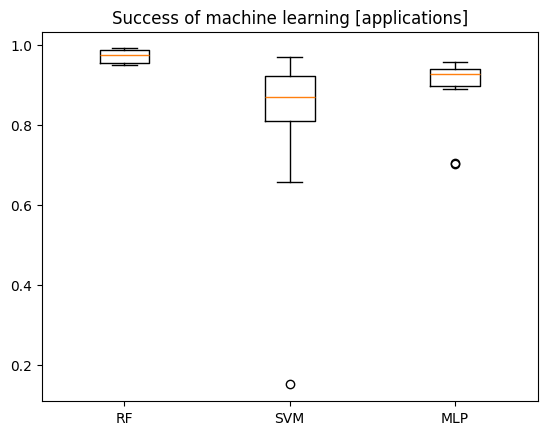

In [40]:
fig1, ax1 = plt.subplots()
plt.title('Success of machine learning [applications]')
ax1.boxplot([scoresRF,scoresSVM, scoresPerceptron], labels = ['RF','SVM', 'MLP'])
#titles for each boxplot

### IGNORE comparing the success of the machine learning applications
Although the best results of the other 2 (SVM and Multi Layer Perceptron) implementations of machine learning can do better than the worst performing result of the Random Forest, It's superior to in terms of average performance and has a smaller margin of error for the same sample size. Even considering the removal of outliers (approx. 0.2 for svm and 0.7 for MLP) of the support vector machine and the multi layer perceptron, although the median might be higher, the best performing results do not exceed the random forest implementation. In terms of which model should be used as a predictor for the regression problem, the random forest is a better choice and should be used over the other 2.